<a href="https://colab.research.google.com/github/JAK0707/Smaller-size-object-detection-using-SAHI/blob/main/Smaller_size_object_detection_using_SAHI_in_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [1]:
!pip install -U torch sahi yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.8 MB/s eta 0:00:00
   ━

In [2]:
import os
os.getcwd()

'/content'

- Import required modules:

In [3]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download a yolov5 model and two test images:

In [11]:
# download YOLOV5S6 model to 'models/yolov5s6.pt'
yolov5_model_path = '/content/best.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [13]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00


In [14]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [37]:
result = get_prediction("/content/dronem.jpg", detection_model)

/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [38]:
result = get_prediction(read_image("/content/dronem.jpg"), detection_model)

/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


- Visualize predicted bounding boxes and masks over the original image:

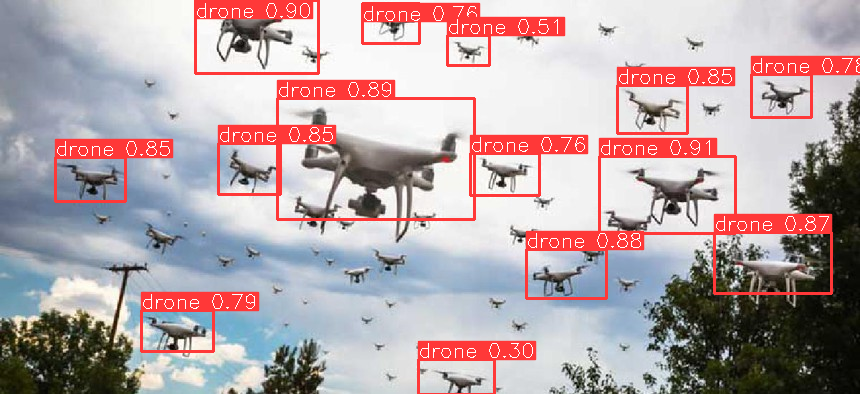

In [39]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [40]:
result = get_sliced_prediction(
    "/content/dronem.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 8 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

- Visualize predicted bounding boxes and masks over the original image:

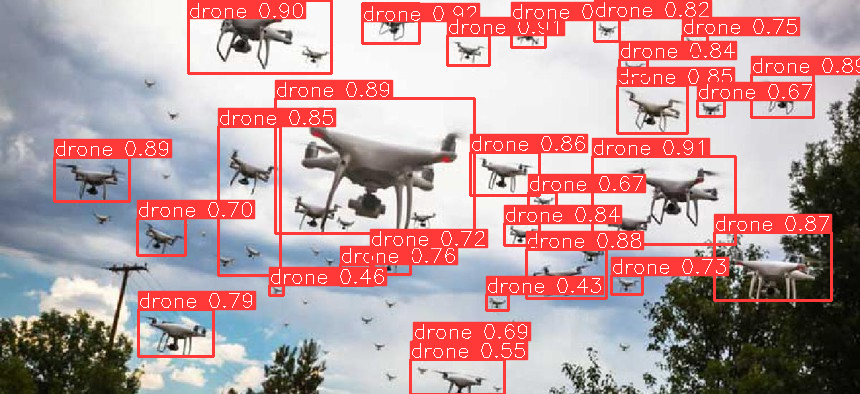

In [41]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [42]:
object_prediction_list = result.object_prediction_list

In [43]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(362.8275451660156, 3.7015392780303955, 419.67364501953125, 43.72742462158203), w: 56.846099853515625, h: 40.025885343551636>,
    mask: None,
    score: PredictionScore: <value: 0.9171759486198425>,
    category: Category: <id: 0, name: drone>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [26]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [362.8275451660156,
   3.7015392780303955,
   56.846099853515625,
   40.025885343551636],
  'score': 0.9171759486198425,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2275},
 {'image_id': None,
  'bbox': [592.5146179199219,
   156.47467041015625,
   143.09335327148438,
   88.43861389160156],
  'score': 0.9114136695861816,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 12654},
 {'image_id': None,
  'bbox': [447.48486328125,
   35.98533248901367,
   41.782073974609375,
   29.87375259399414],
  'score': 0.9064441919326782,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1248}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [27]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [362.8275451660156,
   3.7015392780303955,
   56.846099853515625,
   40.025885343551636],
  'score': 0.9171759486198425,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2275},
 {'image_id': 1,
  'bbox': [592.5146179199219,
   156.47467041015625,
   143.09335327148438,
   88.43861389160156],
  'score': 0.9114136695861816,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 12654},
 {'image_id': 1,
  'bbox': [447.48486328125,
   35.98533248901367,
   41.782073974609375,
   29.87375259399414],
  'score': 0.9064441919326782,
  'category_id': 0,
  'category_name': 'drone',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1248}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [29]:
!pip install -U imantics  # Install the missing 'imantics' library
result.to_imantics_annotations()[:3]  # Now this line should work

  Preparing metadata (setup.py) ... done
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16010 sha256=26e3e0d6ad3214fb76d149704abf0c33015a577d10d1c9128fa5376061db43c5
  Stored in directory: /root/.cache/pip/wheels/56/6a/be/4c60e88b14abec4e93234a1f7f91ce8abe1ae88a2b3eaad3ac
Successfully built imantics


In [28]:
result.to_imantics_annotations()[:3]

ImportError: Please run "pip install -U imantics" to install imantics first for imantics conversion.

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [31]:
!pip install -U fiftyone  # Install the 'fiftyone' library

result.to_fiftyone_detections()[:3]  # Now this line should work

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.7/942.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.2 MB/s eta 0:00:00

[<Detection: {
     'id': '66ccbc26a24d4ef36126f83f',
     'attributes': {},
     'tags': [],
     'label': 'drone',
     'bounding_box': [
         0.42189249437908793,
         0.009394769741193897,
         0.0661001161087391,
         0.10158854148109553,
     ],
     'mask': None,
     'confidence': 0.9171759486198425,
     'index': None,
 }>,
 <Detection: {
     'id': '66ccbc26a24d4ef36126f840',
     'attributes': {},
     'tags': [],
     'label': 'drone',
     'bounding_box': [
         0.6889704859533975,
         0.39714383352831534,
         0.16638762008312136,
         0.22446348703452174,
     ],
     'mask': None,
     'confidence': 0.9114136695861816,
     'index': None,
 }>,
 <Detection: {
     'id': '66ccbc26a24d4ef36126f841',
     'attributes': {},
     'tags': [],
     'label': 'drone',
     'bounding_box': [
         0.5203312363735465,
         0.09133333119039003,
         0.048583806947220205,
         0.07582170709135569,
     ],
     'mask': None,
     'confid

In [30]:
result.to_fiftyone_detections()[:3]

ImportError: Please run "pip install -U fiftyone" to install fiftyone first for fiftyone conversion.

## 4. Batch Prediction

- Set model and directory parameters:

In [32]:
model_type = "yolov5"
model_path = yolov5_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "/content/dronem.jpg"

- Perform sliced inference on given folder:

In [33]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

Performing inference on images:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Performing prediction on 8 slices.


/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/usr/local/lib/python3.10/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast

Prediction time is: 5252.15 ms
Prediction results are successfully exported to runs/predict/exp
